In [83]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

In [4]:
twentyeleven = pd.read_csv(r'/Users/Dang/Desktop/Learning/DataScience_SupplyChain/Jupyternotebook_source/Section_7/twentyeleven.csv')

In [5]:
twentyeleven.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484330 entries, 0 to 484329
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      484329 non-null  float64
 1   StockCode    484330 non-null  object 
 2   Description  484330 non-null  object 
 3   Quantity     484330 non-null  int64  
 4   InvoiceDate  484330 non-null  object 
 5   Price        484330 non-null  float64
 6   Customer ID  367058 non-null  float64
 7   Country      484330 non-null  object 
 8   date         484330 non-null  object 
 9   revenue      484330 non-null  float64
 10  year         484330 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 40.6+ MB


In [6]:
twentyeleven.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,revenue,year
0,539993.0,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04T10:00:00Z,1.95,13313.0,United Kingdom,2011-01-04,19.5,2011
1,539993.0,21499,BLUE POLKADOT WRAP,25,2011-01-04T10:00:00Z,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011
2,539993.0,21498,RED RETROSPOT WRAP,25,2011-01-04T10:00:00Z,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011
3,539993.0,22379,RECYCLING BAG RETROSPOT,5,2011-01-04T10:00:00Z,2.10,13313.0,United Kingdom,2011-01-04,10.5,2011
4,539993.0,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04T10:00:00Z,1.25,13313.0,United Kingdom,2011-01-04,12.5,2011


# Drop duplicates if any from the dataset.

In [10]:
twentyeleven = twentyeleven.drop_duplicates()

In [11]:
twentyeleven.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 484330 entries, 0 to 484329
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      484329 non-null  float64
 1   StockCode    484330 non-null  object 
 2   Description  484330 non-null  object 
 3   Quantity     484330 non-null  int64  
 4   InvoiceDate  484330 non-null  object 
 5   Price        484330 non-null  float64
 6   Customer ID  367058 non-null  float64
 7   Country      484330 non-null  object 
 8   date         484330 non-null  object 
 9   revenue      484330 non-null  float64
 10  year         484330 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 64.3+ MB


# get the week , to get the day of the week, the month and the year from invoice date column

In [14]:
twentyeleven['InvoiceDate'] = pd.to_datetime(twentyeleven['InvoiceDate'])

In [15]:
twentyeleven['InvoiceDate'].dt.week

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


0          1
1          1
2          1
3          1
4          1
          ..
484325    49
484326    49
484327    49
484328    49
484329    49
Name: InvoiceDate, Length: 484330, dtype: int64

In [16]:
twentyeleven['InvoiceDate'].dt.dayofweek

0         1
1         1
2         1
3         1
4         1
         ..
484325    4
484326    4
484327    4
484328    4
484329    4
Name: InvoiceDate, Length: 484330, dtype: int64

In [20]:
twentyeleven['InvoiceDate'].dt.year

0         2011
1         2011
2         2011
3         2011
4         2011
          ... 
484325    2011
484326    2011
484327    2011
484328    2011
484329    2011
Name: InvoiceDate, Length: 484330, dtype: int64

In [23]:
twentyeleven['InvoiceDate'].dt.month

0          1
1          1
2          1
3          1
4          1
          ..
484325    12
484326    12
484327    12
484328    12
484329    12
Name: InvoiceDate, Length: 484330, dtype: int64

In [19]:
twentyeleven['InvoiceDate'].dt.day

0         4
1         4
2         4
3         4
4         4
         ..
484325    9
484326    9
484327    9
484328    9
484329    9
Name: InvoiceDate, Length: 484330, dtype: int64

# Make a new column and called it month year with the month name and year.

In [25]:
twentyeleven['InvoiceDate'].dt.strftime('%m-%Y')

0         01-2011
1         01-2011
2         01-2011
3         01-2011
4         01-2011
           ...   
484325    12-2011
484326    12-2011
484327    12-2011
484328    12-2011
484329    12-2011
Name: InvoiceDate, Length: 484330, dtype: object

In [26]:
twentyeleven['month_year'] = twentyeleven['InvoiceDate'].dt.strftime('%m-%Y')

# Get the last purchase date per customer

In [29]:
last_purchase_date = twentyeleven.groupby('Customer ID', as_index=False)['InvoiceDate'].max()

In [126]:
last_purchase_date = twentyeleven.groupby('Customer ID').agg(last_purchase_date=('date', 'max'))

In [127]:
last_purchase_date

,last_purchase_date
Customer ID,
12347.0,2011-12-07
12348.0,2011-09-25
12349.0,2011-11-21
12350.0,2011-02-02
12352.0,2011-11-03
...,...
18280.0,2011-03-07
18281.0,2011-06-12
18282.0,2011-12-02


# get the recency per customer

In [31]:
max_date = last_purchase_date.InvoiceDate.max()

In [32]:
last_purchase_date['Recency'] = max_date - last_purchase_date['InvoiceDate']

In [35]:
last_purchase_date['Recency'] = last_purchase_date['Recency'].dt.components.days

In [40]:
last_purchase_date.sort_values(by='Recency', ascending=True)

,Customer ID,InvoiceDate,Recency
496,13013.0,2011-12-08 15:01:00+00:00,0
1658,14653.0,2011-12-08 13:45:00+00:00,0
292,12713.0,2011-12-09 12:16:00+00:00,0
3100,16688.0,2011-12-08 15:24:00+00:00,0
1046,13798.0,2011-12-08 15:51:00+00:00,0
...,...,...,...
620,13187.0,2011-01-06 18:57:00+00:00,336
32,12386.0,2011-01-06 12:37:00+00:00,337
2234,15464.0,2011-01-05 15:56:00+00:00,337
2098,15266.0,2011-01-05 13:40:00+00:00,337


In [ ]:
inter_data = pd.DataFrame()
for customer in customers:
    c_d = customer_grouped[customer_grouped['Customer ID'] == customer]
    c_d['previous_date'] = c_d['date'].shift(1)
    inter_data = pd.concat([inter_data,c_d], axis=0)
    

In [41]:
customer_grouped = twentyeleven.groupby(['Customer ID', 'date'], as_index=False).count()[['Customer ID', 'date']]

In [42]:
inter_data = pd.DataFrame()
customers = np.unique(twentyeleven['Customer ID'])
for customer in customers:
    c_d = customer_grouped[customer_grouped['Customer ID'] == customer]
    c_d['previous_date'] = c_d['date'].shift(1)
    inter_data = pd.concat([inter_data, c_d], axis=0)


/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

,Customer ID,date,previous_date
0,12347.0,2011-01-26,NaN
1,12347.0,2011-04-07,2011-01-26
2,12347.0,2011-06-09,2011-04-07
3,12347.0,2011-08-02,2011-06-09
4,12347.0,2011-10-31,2011-08-02
...,...,...,...
15553,18283.0,2011-11-30,2011-11-23
15554,18283.0,2011-12-06,2011-11-30
15555,18287.0,2011-05-22,NaN
15556,18287.0,2011-10-12,2011-05-22


In [45]:
inter_data.head()

,Customer ID,date,previous_date
0,12347.0,2011-01-26,NaN
1,12347.0,2011-04-07,2011-01-26
2,12347.0,2011-06-09,2011-04-07
3,12347.0,2011-08-02,2011-06-09
4,12347.0,2011-10-31,2011-08-02


In [48]:
inter_data['duration'] = pd.to_datetime(inter_data['date']) - pd.to_datetime(inter_data['previous_date'])

In [49]:
inter_data['duration'] = inter_data['duration'].dt.components.days

In [50]:
inter_data

,Customer ID,date,previous_date,duration
0,12347.0,2011-01-26,NaN,NaN
1,12347.0,2011-04-07,2011-01-26,71.0
2,12347.0,2011-06-09,2011-04-07,63.0
3,12347.0,2011-08-02,2011-06-09,54.0
4,12347.0,2011-10-31,2011-08-02,90.0
...,...,...,...,...
15553,18283.0,2011-11-30,2011-11-23,7.0
15554,18283.0,2011-12-06,2011-11-30,6.0
15555,18287.0,2011-05-22,NaN,NaN
15556,18287.0,2011-10-12,2011-05-22,143.0


In [52]:
inter_data.groupby('Customer ID', as_index=False)['duration'].mean().sort_values(by='duration', ascending=True)

,Customer ID,duration
4111,18139.0,1.0
2975,16498.0,1.0
4015,17991.0,1.0
160,12552.0,1.0
1942,15060.0,1.0
...,...,...
4211,18276.0,NaN
4212,18277.0,NaN
4213,18278.0,NaN
4214,18280.0,NaN


In [53]:
twentyeleven['sale'] = twentyeleven['Quantity'] * twentyeleven['Price']

In [54]:
twentyeleven.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,revenue,year,month_year,sale
0,539993.0,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00+00:00,1.95,13313.0,United Kingdom,2011-01-04,19.5,2011,01-2011,19.5
1,539993.0,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00+00:00,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011,01-2011,10.5
2,539993.0,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00+00:00,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011,01-2011,10.5
3,539993.0,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00+00:00,2.10,13313.0,United Kingdom,2011-01-04,10.5,2011,01-2011,10.5
4,539993.0,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00+00:00,1.25,13313.0,United Kingdom,2011-01-04,12.5,2011,01-2011,12.5


In [80]:
twentyeleven['revenue_rolling_two_weeks'] = twentyeleven['revenue'].rolling(window=14).mean()

In [57]:
twentyeleven

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,revenue,year,month_year,sale,revenue_rolling_two_weeks
0,539993.0,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00+00:00,1.95,13313.0,United Kingdom,2011-01-04,19.50,2011,01-2011,19.50,NaN
1,539993.0,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00+00:00,0.42,13313.0,United Kingdom,2011-01-04,10.50,2011,01-2011,10.50,NaN
2,539993.0,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00+00:00,0.42,13313.0,United Kingdom,2011-01-04,10.50,2011,01-2011,10.50,NaN
3,539993.0,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00+00:00,2.10,13313.0,United Kingdom,2011-01-04,10.50,2011,01-2011,10.50,NaN
4,539993.0,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00+00:00,1.25,13313.0,United Kingdom,2011-01-04,12.50,2011,01-2011,12.50,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484325,581587.0,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00+00:00,2.10,12680.0,France,2011-12-09,12.60,2011,12-2011,12.60,34.785714
484326,581587.0,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00+00:00,4.15,12680.0,France,2011-12-09,16.60,2011,12-2011,16.60,20.628571
484327,581587.0,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00+00:00,4.15,12680.0,France,2011-12-09,16.60,2011,12-2011,16.60,16.757143
484328,581587.0,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00+00:00,4.95,12680.0,France,2011-12-09,14.85,2011,12-2011,14.85,16.146429


In [60]:
twentyeleven = twentyeleven.set_index('date')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,revenue,year,month_year,sale,revenue_rolling_two_weeks
date,,,,,,,,,,,,,
2011-01-04,539993.0,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00+00:00,1.95,13313.0,United Kingdom,19.50,2011,01-2011,19.50,NaN
2011-01-04,539993.0,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00+00:00,0.42,13313.0,United Kingdom,10.50,2011,01-2011,10.50,NaN
2011-01-04,539993.0,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00+00:00,0.42,13313.0,United Kingdom,10.50,2011,01-2011,10.50,NaN
2011-01-04,539993.0,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00+00:00,2.10,13313.0,United Kingdom,10.50,2011,01-2011,10.50,NaN
2011-01-04,539993.0,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00+00:00,1.25,13313.0,United Kingdom,12.50,2011,01-2011,12.50,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-09,581587.0,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00+00:00,2.10,12680.0,France,12.60,2011,12-2011,12.60,34.785714
2011-12-09,581587.0,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00+00:00,4.15,12680.0,France,16.60,2011,12-2011,16.60,20.628571
2011-12-09,581587.0,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00+00:00,4.15,12680.0,France,16.60,2011,12-2011,16.60,16.757143


In [75]:
test = twentyeleven[['revenue']]

In [79]:
twentyeleven['revenue_rolling_one_weeks'] = twentyeleven['revenue'].rolling(window=7).mean()

<AxesSubplot:>

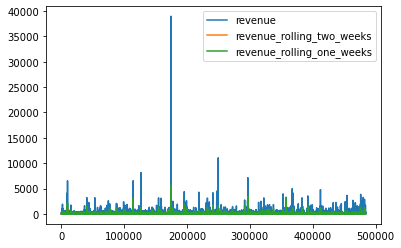

In [81]:
twentyeleven[['revenue', 'revenue_rolling_two_weeks', 'revenue_rolling_one_weeks']].plot()

In [100]:
test = twentyeleven[['revenue', 'revenue_rolling_two_weeks', 'revenue_rolling_one_weeks', 'date']]
test['date'] = pd.to_datetime(test['date'])

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [103]:
test = test.set_index('date')

In [104]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 484330 entries, 2011-01-04 to 2011-12-09
Data columns (total 3 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   revenue                    484330 non-null  float64
 1   revenue_rolling_two_weeks  484317 non-null  float64
 2   revenue_rolling_one_weeks  484324 non-null  float64
dtypes: float64(3)
memory usage: 14.8 MB


<AxesSubplot:xlabel='date'>

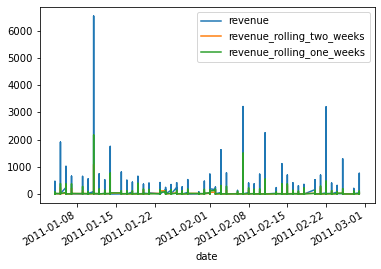

In [124]:
test['2011-01': '2011-02'].plot()

In [115]:
week_series_sum = test['revenue'].resample('W').sum()

<AxesSubplot:xlabel='date'>

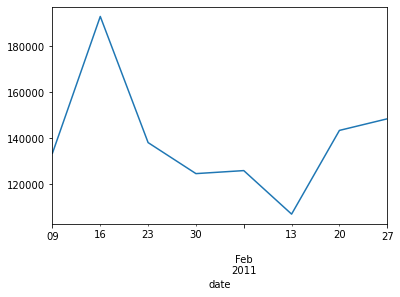

In [125]:
week_series_mean['2011-01': '2011-02'].plot()